<a href="https://colab.research.google.com/github/JavierArdans/Data-Science---ACV/blob/main/Final_ACV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEMATICA, DEFINICION, CONTEXTO**

## DEFINICION DEL OBJETIVO

A través de los datos de pacientes con ACV, se creará un modelo que permita aprender sobre las condiciones que determinan que una persona padezca un ACV.

## TEMATICA ELEGIDA

La temática a abordar es el ACV; Cada año, casi 800 000 personas tienen un accidente cerebrovascular, más de 140 000 mueren y muchos sobrevivientes quedan con discapacidades. Esto es alarmante teniendo en cuenta que cerca del 80 % de los accidentes cerebrovasculares son prevenibles.

En Uruguay mueren unas cinco personas por día a causa del ACV.

La patología tiene un alto costo para el sistema de salud a nivel mundial, consumiendo del 2% al 4% de todos los recursos en salud.

## CONTEXTO COMERCIAL
El accidente cerebrovascular (ACV) es una de las principales causas de discapacidad y muerte en todo el mundo, y puede tener un impacto significativo en la calidad de vida de las personas que lo sufren. Por esta razón, la prevención del ACV es un tema importante en el contexto comercial de la atención médica y la salud pública.

En términos de atención médica, los profesionales de la salud pueden recomendar cambios en el estilo de vida, como una dieta saludable y ejercicio regular, para reducir el riesgo de ACV.

En el ámbito de la salud pública, la prevención del ACV también puede ser un enfoque importante para las empresas y organizaciones que buscan promover la salud y el bienestar en la comunidad. Estos grupos pueden realizar campañas de concienciación sobre los factores de riesgo del ACV y proporcionar recursos educativos para ayudar a las personas a tomar medidas preventivas. Además, pueden trabajar con los responsables políticos y las autoridades sanitarias para implementar políticas y programas que fomenten estilos de vida más saludables y reduzcan la incidencia del ACV en la población.

En resumen, la prevención del ACV es un tema importante en el contexto comercial de la atención médica y la salud pública. Tanto los proveedores de atención médica como las empresas y organizaciones pueden desempeñar un papel importante en la prevención del ACV mediante la promoción de prácticas saludables y la provisión de productos y servicios que ayuden a reducir el riesgo de ACV.

## PROBLEMA COMERCIAL
Desde una perspectiva comercial, el ACV puede plantear varios problemas. En primer lugar, el costo de atención médica asociado con el tratamiento del ACV puede ser significativo, especialmente si se consideran los costos a largo plazo de la rehabilitación y la atención continua necesaria para las personas que sufren discapacidad permanente después del ACV.
Las preguntas serían:

- ¿Se puede prevenir?
- ¿Qué factores son los que inciden?
- ¿Qué podemos hacer para evitarla?


# **CONTEXTO ANALITICO**

## Los Tipos de Datos que tenemos para trabajar son:

* **id**: Identificador

* **gender**: Genero, "Male/Masculino", "Female/Femenino" u "Other/Otro"

* **age**: Edad del paciente.

* **hypertension**: Hay 2 valores, 0 si el paciente no tiene hipertension, y 1 si lo tiene.

* **heart_disease**: Hay 2 valores, 0 si el paciente no tiene enfermedades en el corazón, y 1 si lo tiene.

* **ever_married**: Si el paciente está casado o no.

* **work_type**: Los tipos de trabajo, "children/niño", "Govt_jov/Trabajo en el gobierno", "Never_worked/Nunca trabajó", "Private/Privado" or "Self-employed/Trabaja por cuenta propia".

* **Residence_type**: Tipo de residencia "Rural" or "Urban/Urbana".

* **avg_glucose_level**: Nivel de Glucosa en la sangre

* **bmi**: Indice de masa corporal.

* **smoking_status**: Fumador? "formerly smoked/ Anteriormente fumaba", "never smoked /Nunca fumó", "smokes/Fuma" or "Unknown/Desconocido".

* **stroke**: Hay 2 valores, 0 si el paciente no tuvo derrame cerebral, y 1 si lo tuvo/tiene.


**Visto los datos observamos que:**


> 1.   La variable objetivo es Stroke, ya que indica si el paciente tuvo/tiene ACV.

> 2.   Por lo que vemos acá en 3 columnas (Hypertension, Heart Disease y Stroke) los valores son 1 o 0, para un mejor manejo de estos datos, lo que vamos a hacer es categorizarlos a objetos.








# **DATA ACQUISITION**

Importamos las librerias a utilizar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

Cargamos el dataset elegido:

In [ ]:
acv = pd.read_csv ('/content/acv1.csv')

In [ ]:
acv.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Eliminamos la columna 'ID' (modificando el dataset original), ya que no es un dato que nos importe en el estudio.

In [ ]:
acv.drop('id', axis=1, inplace=True)

Binarizamos la columna de datos 'stroke' pasandolo a Integer, ya que la vamos a necesitar para estudiar más adelante.

In [ ]:
acv['stroke'] = acv['stroke'].astype(int)
acv.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Vemos la informacíon del Data Frame importado, con los tipos de datos que utiliza en sus columnas

In [ ]:
acv.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


Con el método describe obtenemos un resúmen de las columnas del Data Frame, y redondeamos las cifras significativas a 2 decimales, para que sea más fácil interpretar los valores.


# **DATA WRANGLING**

Comenzamos realizando la preparación de los datos, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

**Limpiar el Dataset:**

Limpiar celdas vacías

Limpiar mal formato

Revisar si hay valores faltantes (NaN)

Borrar duplicados

In [ ]:
for column in acv.columns:
    value_counts = acv[column].value_counts()
    print(f"Columna: {column}")
    print(value_counts)
    print()

Columna: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Columna: age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

Columna: hypertension
0    4612
1     498
Name: hypertension, dtype: int64

Columna: heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64

Columna: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64

Columna: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Columna: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Columna: avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

Columna: bmi
28.7    41

In [ ]:
sin_valores = (acv[['hypertension','heart_disease','avg_glucose_level','bmi','stroke']] == np.nan).sum()
acv.replace({'unknown':'0'}, regex= True, inplace= True)
print(sin_valores)

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


Observamos que en el DataSet no existen celdas NULL

**Indexamiento de datos:**


Podemos observar que existen datos nulos en la columna "BMI".

Dichos datos refieren al índice de masa corporal.


Otro factor importante, es saber cual es la edad donde se presenta el problema planteado, por eso necesitamos saber cual es la edad donde se presenta el problema.

In [ ]:
acv.groupby(['age','stroke'])

In [ ]:
acv.groupby(['age','stroke'])['age'].count()

age    stroke
0.08   0          2
0.16   0          3
0.24   0          5
0.32   0          5
0.40   0          2
                 ..
80.00  1         17
81.00  0         46
       1         14
82.00  0         47
       1          9
Name: age, Length: 148, dtype: int64

In [ ]:
acv['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Vemos que el 95% del registro, son pacientes que no han tenido derrames cerebrales, y el 5% si.

In [ ]:
stroke = acv['stroke'] == 1
stroke.head()

0    True
1    True
2    True
3    True
4    True
Name: stroke, dtype: bool

# **EDA - Exploratory Data Analysis**

1 Realizar exámen Gráfico y breve análisis estadístico.

2 Analizar Correlaciones.

3 Evaluar supuestos distribuicionales

Crearemos un indice, para segmentar las personas mayores e igual de 55 años, ya que son la franja que corren mayor riesgo de sufrir un accidente cerebrovascular

In [ ]:
acv55 = acv.query("age > 55")

In [ ]:
stroke55 = acv.query("age > 55 and stroke < 1")

Text(0.5, 1.0, 'Boxplot')

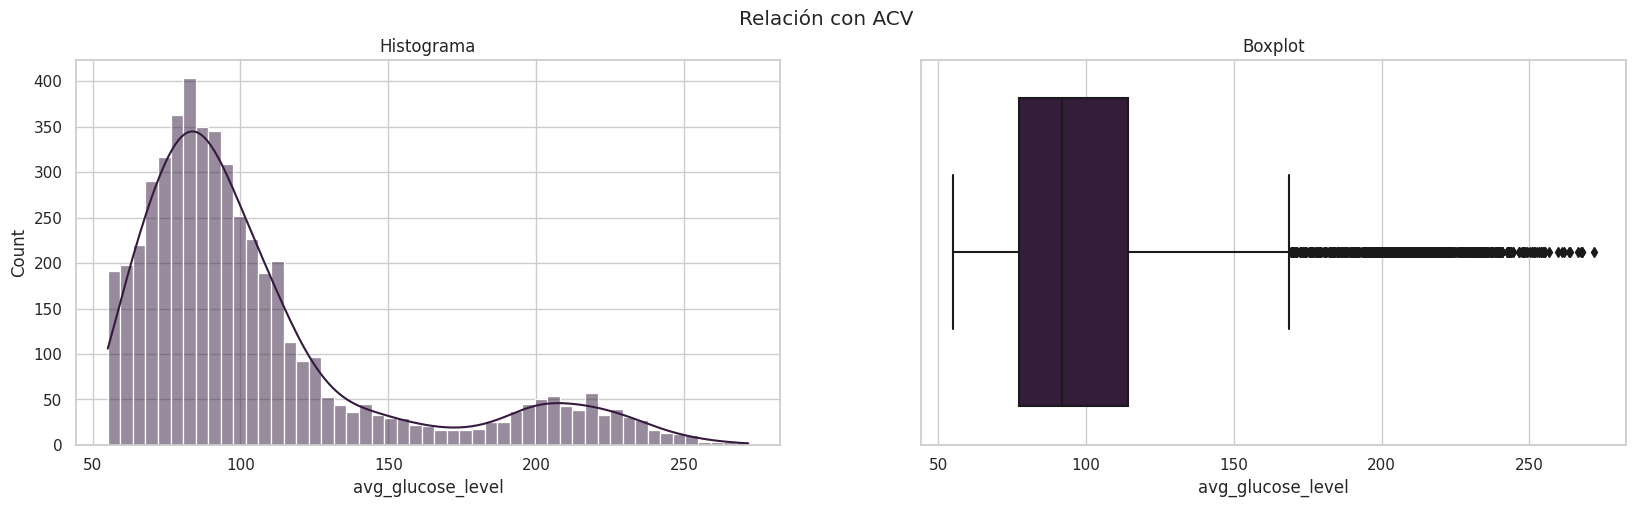

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Relación con ACV')

# Histograma
sns.histplot(ax=axes[0], x = acv['avg_glucose_level'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = acv['avg_glucose_level'])
axes[1].set_title("Boxplot")


*  Grupo de entrevistados con niveles de glucosa bajos: Ha sido representado por
el primer pico del histograma, este grupo ha tenido valores de glucosa más bajos en comparación con el segundo grupo. Podrían haber sido individuos saludables o con condiciones médicas controladas.


*  Grupo de entrevistados con niveles de glucosa altos: Ha sido representado por el segundo pico del histograma, este grupo ha tenido valores de glucosa más altos en comparación con el primer grupo. Podrían haber sido individuos con diabetes, resistencia a la insulina u otras condiciones médicas relacionadas con niveles elevados de glucosa.

## Una distribución bimodal en este caso indicaría que la población estudiada no ha sido homogénea en términos de niveles de glucosa, sino que se ha dividido en dos grupos bien diferenciados.##

In [ ]:
agrupado_acv = acv[(acv['stroke'] == 1) & (acv['age'].between(40, 80))]

Creamos un grupo de personas que tuvieron ACV, y sus edades son mayores a los 40 años.

## **CORRELACIONES Y DEPENDENCIAS**

<ipython-input-20-3dd2ba2c5bf1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(acv.corr(),2),annot=True)


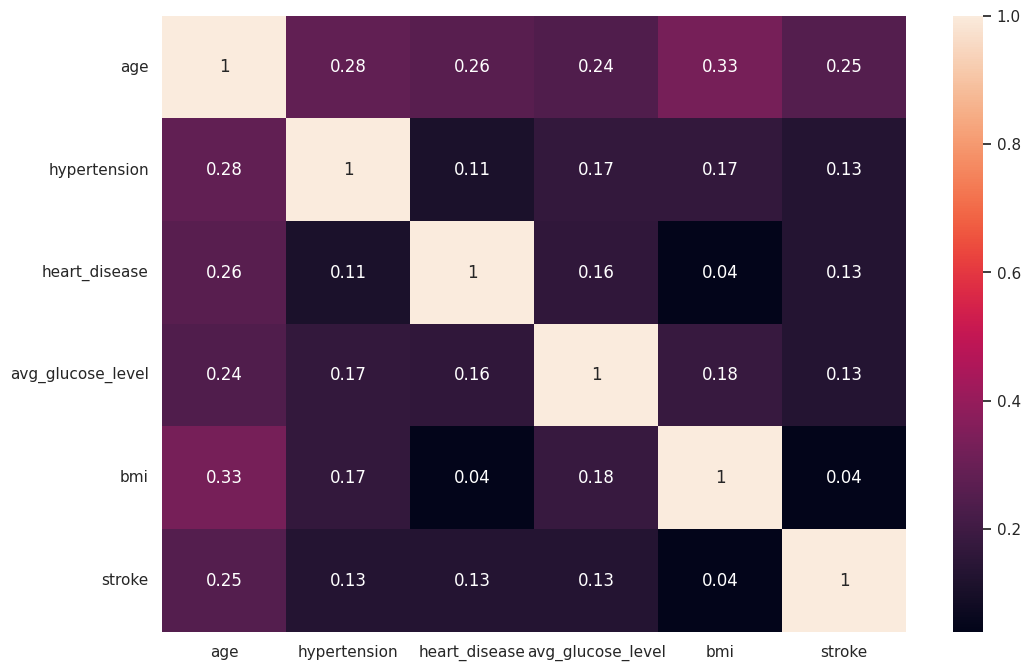

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.round(acv.corr(),2),annot=True)
plt.show()

Lo que vemos acá es la correlación y dependencia, entre las variables, donde se ve el valor más alto en la intersección entre EDAD y BMI (Indice de masa corporal), en 2do nivel, se ve a la edad conjuntamente al nivel de glucosa, y por ultimo el nivel de glucosa con el BMI.


# **STORYTELLING**

In [ ]:
# Para la siguiente entrega, lo que voy a hacer es generar un nuevo dataset, a modo de que no quede tan cargado la parte del storytelling con los pasos previos

acv.to_csv('ACV-Storytelling.csv', index=False)

## Storytelling

Se deja el link para visualizar el storytelling desarrollado del proyecto:
https://github.com/JavierArdans/Data-Science---ACV/blob/main/Storytelling_ACV.ipynb

Imagina que estás sentado en tu oficina, trabajando en tu computadora. De repente, comienzas a sentir un dolor intenso en la cabeza y tu brazo izquierdo se entumece. Tratas de moverlo, pero no responde. Tu habla se vuelve incoherente y te das cuenta de que algo está muy mal.

Lo que estás experimentando es un ACV. Los ACV son causados ​​por la interrupción del suministro de sangre al cerebro, y pueden ser fatales o dejar discapacidades graves. Son la segunda causa principal de muerte a nivel mundial y pueden afectar a cualquier persona, en cualquier momento.

**Pero hay buenas noticias:** la mayoría de los ACV se pueden prevenir con algunos cambios en tu estilo de vida. Aquí hay algunas cosas que puedes hacer para reducir tu riesgo de tener un ACV:

**Controla tu presión arterial:** La hipertensión es uno de los principales factores de riesgo para el ACV. Asegúrate de hacer chequeos regulares y tomar medicamentos según lo recetado por tu médico.

**Deja de fumar:** Fumar daña tus arterias y aumenta tu riesgo de tener un ACV. Si eres fumador, considera dejarlo lo antes posible.

**Mantén una dieta saludable:** Consumir una dieta rica en frutas, verduras, granos enteros, proteínas magras y grasas saludables puede ayudar a reducir tu riesgo de ACV. Limita la ingesta de alimentos procesados, grasas saturadas y azúcares refinados.

**Haz ejercicio regularmente:** La actividad física regular puede ayudar a reducir tu riesgo de ACV. Trata de hacer al menos 150 minutos de ejercicio moderado a la semana.

**Controla tu peso:** El sobrepeso y la obesidad aumentan tu riesgo de ACV. Si tienes sobrepeso, trata de perder peso gradualmente a través de una combinación de ejercicio y cambios en la dieta.

**Recuerda, la prevención es la clave para evitar un ACV. Haz algunos cambios en tu estilo de vida hoy para proteger tu salud y bienestar a largo plazo.**

CARGANDO INFORMACION GENERAL DE DATASET, TOTAL DE ENTRADAS, TOTAL DE NO NULOS, Y TIPO DE DATOS.

LIMPIEZA DEL DATASET

In [ ]:
# Eliminar las filas con valores nulos
acv = acv.dropna()

# Rellenar los valores nulos con cero
acv = acv.fillna(0)

# Rellenar los valores nulos con la media de cada columna
acv = acv.fillna(acv.mean())

<ipython-input-37-2b87b25c336c>:8: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# DESCRIPCION DEL DATASET, MOSTRANDO LA SUMA, LA MINIMA, LA MAXIMA Y MEDIA ETC
acv.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4909.00,4909.00,4909.00,4909.00,4909.00
mean,42.87,0.09,0.05,105.31,28.89
std,22.56,0.29,0.22,44.42,7.85
min,0.08,0.00,0.00,55.12,10.30
25%,25.00,0.00,0.00,77.07,23.50
50%,44.00,0.00,0.00,91.68,28.10
75%,60.00,0.00,0.00,113.57,33.10
max,82.00,1.00,1.00,271.74,97.60


DESCRIPCION DEL DATASET, MOSTRANDO LA SUMA, LA MINIMA, LA MAXIMA Y MEDIA ETC

MANEJO DE LOS TIPOS DE CATEGORÍAS DE LOS DATOS:

Tanto las características categóricas como las numéricas están presentes.

- Características categóricas: gender, ever_married, work_type, Residence_type, smoking_status
- Características numéricas binarias: hypertension,heart_disease, stroke
- Características numéricas continuas: age, avg_glucose_level, bmi

La mayoría de los datos son categóricos que necesitan una atención especial para visualizarlos.
La extracción de características se puede hacer agrupando las características continuas (edad, nivel de azúcar e índice de masa corporal) y mantengamos todo como está.

Text(0.5, 1.0, 'Matris de valores nulos o vacíos')

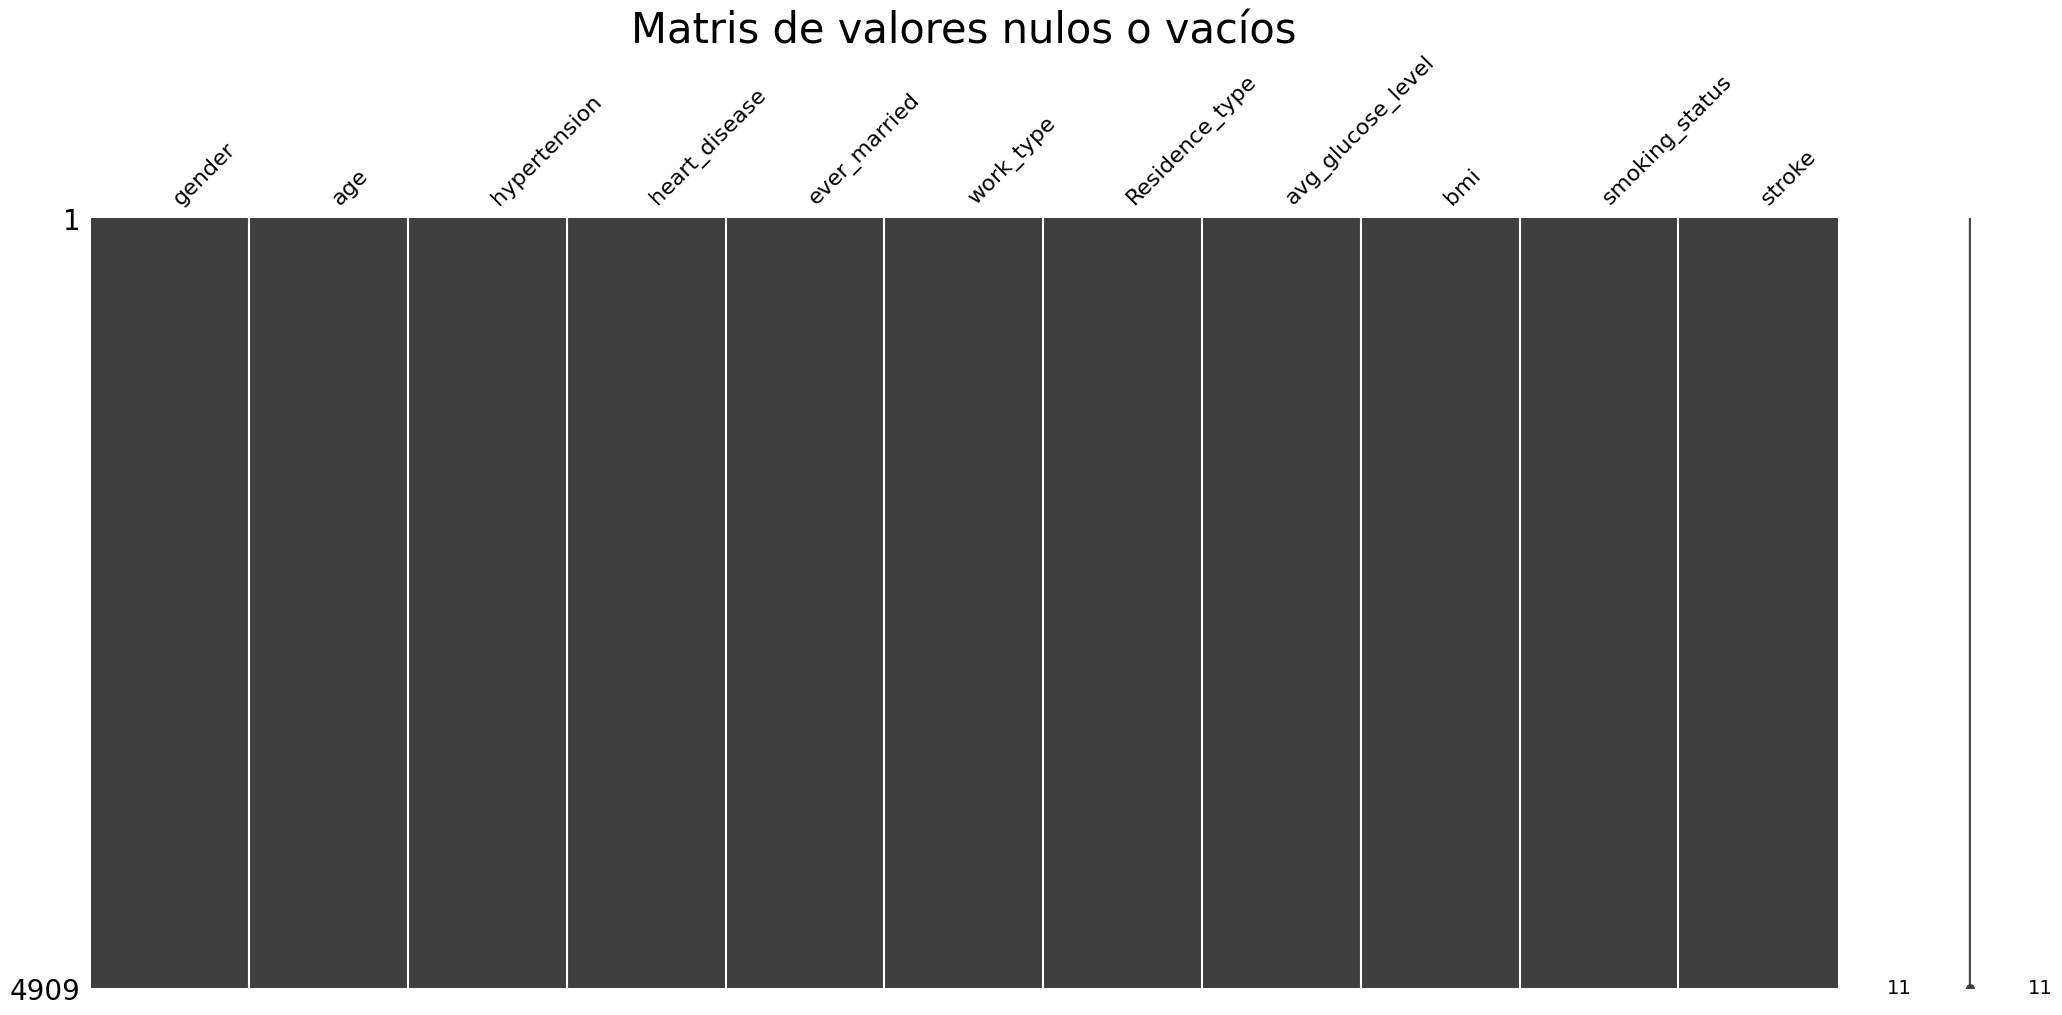

In [ ]:
msno.matrix(acv)
plt.title("Matris de valores nulos o vacíos",fontsize=30)

In [ ]:
# TRABAJANDO CON LOS DATOS FALTANTES
acv['bmi'] = acv['bmi'].fillna(round (acv['bmi'].median(), 2))
acv.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# AGRUPANDO VARIABLES NUMÉRICAS

acv['bmi_cat'] = pd.cut(acv['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
acv['age_cat'] = pd.cut(acv['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
acv['glucose_cat'] = pd.cut(acv['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

In [ ]:
# CONTANDO CASOS POSITIVOS Y NEGATIVOS

x = pd.DataFrame( acv.groupby(['stroke'])['stroke'].count())
print (x)

        stroke
stroke        
False     4700
True       209


<BarContainer object of 1 artists>

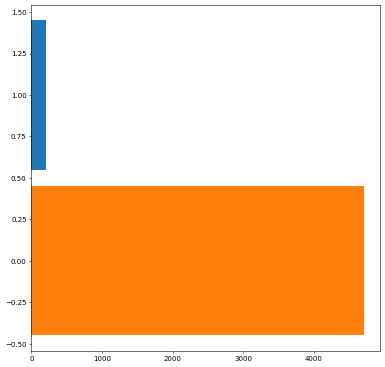

In [ ]:
# SUBPLOT MOSTRANDO LA DIFERENCIA ENTRE LOS ESTADOS DE LOS ENCUESTADOS
fig, ax = plt.subplots(figsize = (9,9), dpi = 50)
ax.barh([1], x.stroke[1], height = 0.9,)
ax.barh([0], x.stroke[0], height = 0.9,)


La distribuicion de los encuestados, es mayoritariamente en casos negativos de acv.

Text(0.5, 1.0, 'Boxplot')

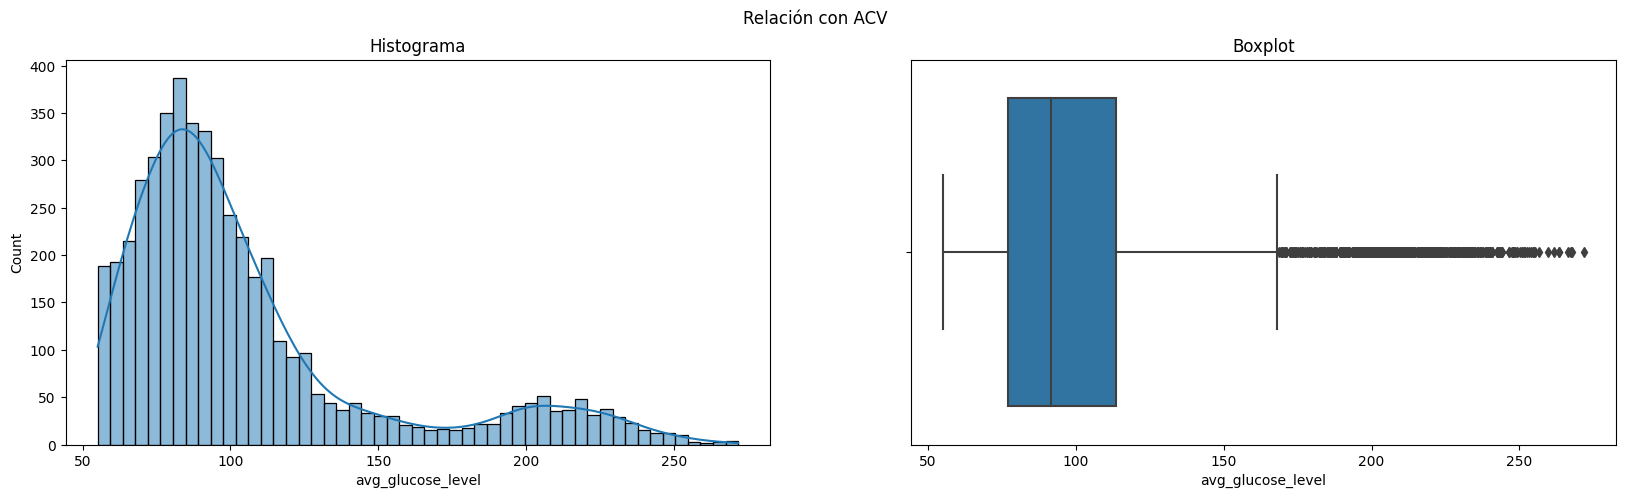

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Relación con ACV')

# Histograma
sns.histplot(ax=axes[0], x = acv['avg_glucose_level'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = acv['avg_glucose_level'])
axes[1].set_title("Boxplot")

Se logra distinguir que de los entrevistados los niveles de Gluvosa son de la mayoría de un bajo nivel.

In [ ]:
df_no_stroke = acv[acv['stroke'] == 0]
df_stroke = acv[acv['stroke'] == 1]

In [ ]:
df_no_stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,4700.000000,4700.000000,4700.000000
mean,41.760451,104.003736,28.823064
std,22.268129,42.997798,7.908287
min,0.080000,55.120000,10.300000
25%,24.000000,76.887500,23.400000
50%,43.000000,91.210000,28.000000
75%,59.000000,112.432500,33.100000
max,82.000000,267.760000,97.600000


In [ ]:
df_stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,209.000000,209.000000,209.000000
mean,67.712919,134.571388,30.471292
std,12.402848,62.462047,6.329452
min,14.000000,56.110000,16.900000
25%,58.000000,80.430000,26.400000
50%,70.000000,106.580000,29.700000
75%,78.000000,196.920000,33.700000
max,82.000000,271.740000,56.600000


A simple vista puede notarse que las personas que sufrieron un ACV tienen una mayor media y mediana de edades que las que no. Lo mismo se cumple, en menor medida, para el promedio de glucosa en sangre.

In [ ]:
# Prepara los datos
hist_data = [df_stroke['age'], df_no_stroke['age']]
group_labels = ['stroke age', 'no stroke age']

# Configura los colores para cada grupo
colors = ['#FF4136', '#3D9970']

# Crea el gráfico de distribución combinada
fig = ff.create_distplot(hist_data, group_labels, bin_size=2, colors=colors, show_rug=False)

# Personaliza el diseño del gráfico
fig.update_layout(title='Edades de víctimas y no víctimas',
                  xaxis_title='Edad',
                  yaxis_title='Densidad')

# Muestra el gráfico
fig.show()

Teniendo en cuenta las edades de las victimas y no victimas de ataques cardíacos

In [ ]:
# Prepara los datos
hist_data = [df_stroke['avg_glucose_level'], df_no_stroke['bmi']]
group_labels = ['stroke age', 'no stroke age']

# Configura los colores para cada grupo
colors = ['#FF4136', '#3D9970']

# Crea el gráfico de distribución combinada
fig = ff.create_distplot(hist_data, group_labels, bin_size=2, colors=colors, show_rug=False)

# Personaliza el diseño del gráfico
fig.update_layout(title='Relación entre ritmo cardíaco y su índice de masa corporal',
                  xaxis_title='Valor',
                  yaxis_title='Densidad')

# Muestra el gráfico
fig.show()

En ésta gráfica lo que observamos es que dependiendo del índice de masa corporal (bmi) a un valor elevado de glucosa en sangre es donde se comienzan a ver los problemas cardíacos.

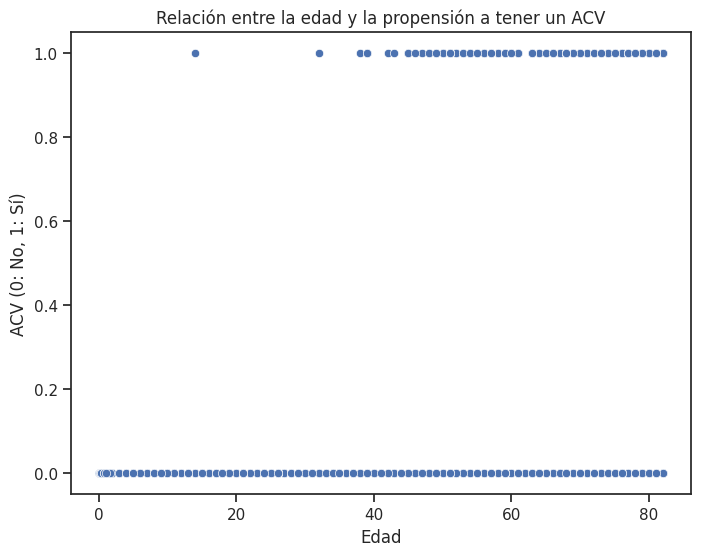

In [ ]:
# Crear el scatterplot
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Plot scatterplot
sns.scatterplot(x='age', y='stroke', data=acv)

# Personaliza los ejes y el título del gráfico
plt.xlabel('Edad')
plt.ylabel('ACV (0: No, 1: Sí)')
plt.title('Relación entre la edad y la propensión a tener un ACV')

# Mostrar el gráfico
plt.show()

Lo que vemos en la gráfica es que a partir de los 40 años es cuando se empiezan a hacer mas frecuentes indicando una mayor propensión a tener un ACV.

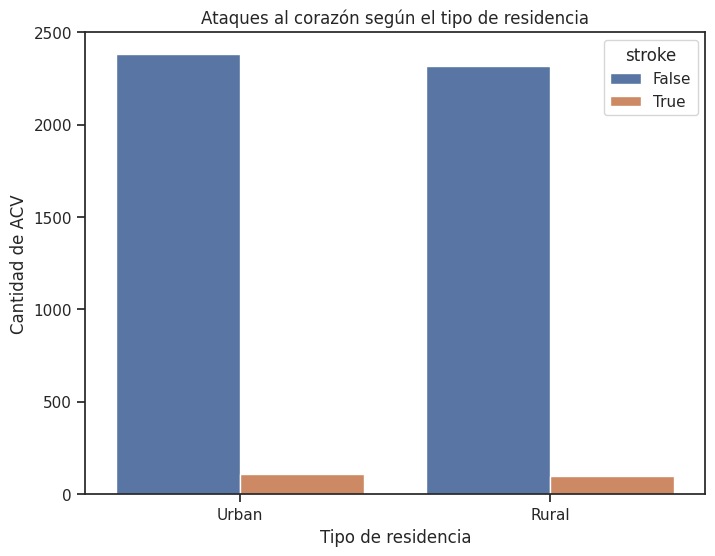

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Plot de barras
sns.countplot(x='Residence_type', hue='stroke', data=acv)

# Personalizar los ejes y el título del gráfico
plt.xlabel('Tipo de residencia')
plt.ylabel('Cantidad de ACV')
plt.title('Ataques al corazón según el tipo de residencia')

# Mostrar el gráfico
plt.show()


En el gráfico de barras vemos la cantidad de ataques al corazón en función al tipo de residencia.
Como se aprecia, no hay mucha diferencia entre el lugar de resudencia, con tener problemas cardíacos

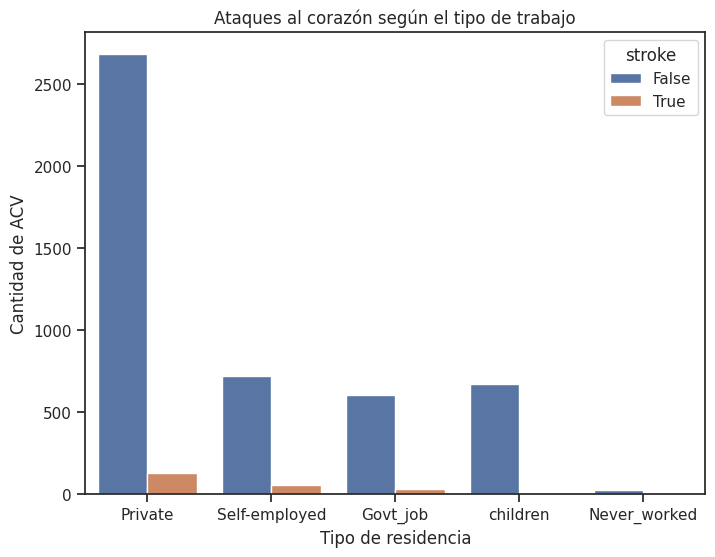

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Plot de barras
sns.countplot(x='work_type', hue='stroke', data=acv)

# Personalizar los ejes y el título del gráfico
plt.xlabel('Tipo de residencia')
plt.ylabel('Cantidad de ACV')
plt.title('Ataques al corazón según el tipo de trabajo')

# Mostrar el gráfico
plt.show()

En éstas gráficas lo que vemos es que la gran diferencia entre los entrevistados, es que los empleados privados, son más propensos a los ataques al corazón...

# **MACHINE LEARNING**

## Importación e Instalación de Librerias.

In [ ]:
pip install -q pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.1 MB/s eta 0:00:00


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(acv)
prof.to_file(output_file='ACV.html')
display(ProfileReport(acv))

<ipython-input-23-f223733b2638>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install -q mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

## Métodos a utilizar

Usaremos la Regresion Logística ya que se utiliza para determinar si una o múltiples variables independientes tienen un efecto sobre una variable dependiente binaria.

In [ ]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = acv.drop('stroke', axis=1)
y=acv[['stroke']]

In [ ]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Escalado y Encodeo

In [ ]:
from sklearn.pipeline import Pipeline # generador de pipeline de trabajao
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder #encoder para trasnformar columnas
from sklearn.model_selection import train_test_split # split de train y test
from sklearn.compose import ColumnTransformer #code to use feature cat and numeric together
from sklearn.impute import SimpleImputer # fill a value
from sklearn.compose import make_column_selector #selector in pipeline by dtypes

numeric_transformer = Pipeline(
    steps=[('fill', SimpleImputer()),
           ("scaler", MinMaxScaler())])

#generar un pipeline para categoricas
categorical_transformer = OneHotEncoder(drop='first', handle_unknown="ignore")

#funcion que realiza el trabajo para cada pipeline y luego unirlo
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ]
)
preprocessor.fit_transform(X_train)


array([[0.04692082, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35239492, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.53567937, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01221896, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97556207, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5601173 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

##Entrenamiento

Se generan los conjuntos para entrenamiento y prueba (train-test split)

In [ ]:
#trasnformacion de X_train
X_array_enc = preprocessor.transform(X_train)
X_array_enc

array([[0.04692082, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35239492, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.53567937, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01221896, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97556207, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5601173 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.select_dtypes(exclude='object').columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [ ]:
preprocessor.named_transformers_['cat'].get_feature_names_out()

array(['gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [ ]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat'].get_feature_names_out())
columns_enc

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [ ]:
#genero nombres de columnas
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat'].get_feature_names_out())
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc)
X_train_enc

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.046921,0.0,0.0,0.162958,0.067583,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.352395,0.0,0.0,0.703813,0.143184,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.535679,1.0,0.0,0.166928,0.185567,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.828935,1.0,0.0,0.441418,0.343643,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.755621,0.0,0.0,0.126720,0.294387,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,0.523460,0.0,0.0,0.151787,0.232532,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3573,0.743402,1.0,0.0,0.530560,0.571592,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3574,0.012219,0.0,0.0,0.194627,0.085911,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3575,0.975562,0.0,0.0,0.650725,0.237113,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
preprocessor.named_transformers_['cat'].get_feature_names_out()
#X_train.select_dtypes(exclude='object').columns

array(['gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

## Verificacion para ajustar modelo

VERIFICACION PASO A PASO PARA AJUSTAR EL MODELO

Igualdad de líneas - Dimensiones coincidentes

Variables numéricas:

In [ ]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3577 non-null   float64
 1   hypertension                    3577 non-null   float64
 2   heart_disease                   3577 non-null   float64
 3   avg_glucose_level               3577 non-null   float64
 4   bmi                             3577 non-null   float64
 5   gender_Male                     3577 non-null   float64
 6   ever_married_Yes                3577 non-null   float64
 7   work_type_Never_worked          3577 non-null   float64
 8   work_type_Private               3577 non-null   float64
 9   work_type_Self-employed         3577 non-null   float64
 10  work_type_children              3577 non-null   float64
 11  Residence_type_Urban            3577 non-null   float64
 12  smoking_status_formerly smoked  35

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 3897 to 860
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stroke  3577 non-null   int64
dtypes: int64(1)
memory usage: 55.9 KB


In [ ]:

# Crear una instancia del modelo de regresión logística y ajustarlo a los datos de entrenamiento
model = LogisticRegression(max_iter=10000, n_jobs=-1)
model.fit(X_train_enc, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, n_jobs=-1)

Valores válidos:

In [ ]:
X_train_enc.shape

(3577, 15)

In [ ]:
model.coef_

array([[ 4.84661148,  0.43681153,  0.41468567,  0.91039982, -0.10937738,
        -0.061716  , -0.24133334, -0.0792785 ,  0.12432476, -0.21726505,
         0.29135909,  0.12926831, -0.10489251, -0.15555603,  0.12869728]])

In [ ]:
X_test1 = preprocessor.transform(X_test)
predicciones= model.predict(X_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test, predicciones))

0.9425962165688193


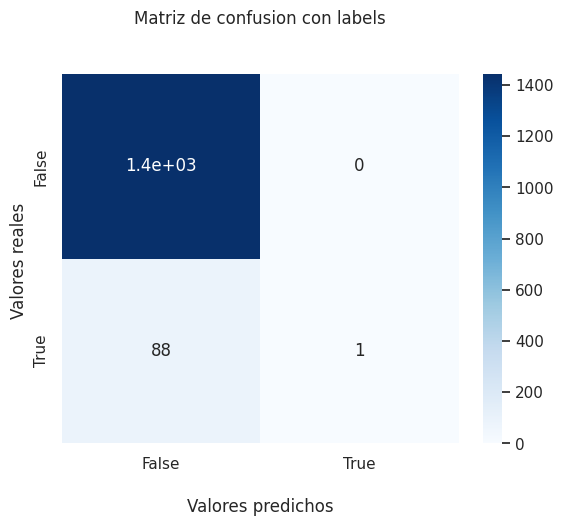

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## Probando nuevos modelos de Clasificación:




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Precision Score

In [ ]:
print(precision_score(y_test, predicciones))

1.0


Recall Score

In [ ]:
print(recall_score(y_test, predicciones))

0.011235955056179775


F1-Score

In [ ]:
print(f1_score(y_test, predicciones))

0.02222222222222222


Accuracy Score

In [ ]:
print(accuracy_score(y_test, predicciones))

0.9425962165688193


**REGRESION LOGISTICA**

Precision Score: 1

F1 Score: 0.02222222222222222

Recall Score: 0.011235955056179775

Accuracy Score: 0.9425962165688193

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# entrenar un modelo de árbol de decisión

model_Tree = DecisionTreeClassifier(random_state=42)
model_Tree.fit(X_train_enc, y_train)

# hacer predicciones sobre los datos de prueba
X_test1 = preprocessor.transform(X_test)
predicciones= model_Tree.predict(X_test1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(precision_score(y_test, predicciones))

0.20481927710843373


In [ ]:
print(f1_score(y_test, predicciones))

0.19767441860465113


In [ ]:
print(recall_score(y_test, predicciones))

0.19101123595505617


In [ ]:
print(accuracy_score(y_test, predicciones))

0.9099804305283757


**ARBOL DE DECISIÓN**

Precision Score: 0.20481927710843373

F1 Score: 0.19767441860465113

Recall Score: 0.19101123595505617

Accuracy Score: 0.9099804305283757



**CROSS VALIDATION (K-FOLD)**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generar datos de ejemplo
X, y = make_regression(n_samples=100, n_features=1, noise=0.5)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Realizar la validación cruzada k-fold con k=5
k = 5
scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

# Obtener el promedio de los scores y convertirlos a positivos
mean_score = -scores.mean()

print(f"Puntaje promedio de MSE en validación cruzada k-fold ({k} folds): {mean_score}")

Puntaje promedio de MSE en validación cruzada k-fold (5 folds): 0.25195792893953195


**CONCLUSIÓN**

Se genera un modelo para la prediccion en base al estudio del ACV, a partir de los datos obtenidos de los pacientes, obteniendo las métricas indicadas.

**REGRESIÓN LOGISTICA**

Precision Score: 1

F1 Score: 0.02222222222222222

Recall Score: 0.011235955056179775

Accuracy Score: 0.9425962165688193

En general, el modelo muestra una alta precisión global (accuracy), lo que indica que clasifica correctamente la gran mayoría de las instancias.

**ARBOL DE DECISIÓN**

Precision Score: 0.20481927710843373

F1 Score: 0.19767441860465113

Recall Score: 0.19101123595505617

Accuracy Score: 0.9099804305283757


Si bien la Accuracy es alta, comparando con la Regresion Logistica es inferior, por lo que nos decantamos por el anterior método.

Puntaje promedio de MSE en validación cruzada k-fold (5 folds): 0.25195792893953195

De acuerdo al puntaje obtenido podemos definir que:

- La prediccion perfecta seria de 0, o sea que teniendo 0.22 podriamos decir de que nuestro modelo tiene un rendimiento aceptable, aunque se podría mejorar.
- En este caso como el dataset utilizado se trata de una prediccion relacionada a una enfermedad, el escenario ideal es que este número sea lo más bajo posible.

# **CONCLUSIÓN Y RESPUESTAS**

De las interrogantes que nos habiamos planteado:

1. ¿Se puede prevenir?
2. ¿Qué factores son los que inciden?
3. ¿Qué podemos hacer para evitarla?

La mayoría de los ACV se pueden prevenir con algunos cambios en tu estilo de vida. Aquí hay algunas cosas que puedes hacer para reducir tu riesgo de tener un ACV:

* Controla tu presión arterial: La hipertensión es uno de los principales factores de riesgo para el ACV. Asegúrate de hacer chequeos regulares y tomar medicamentos según lo recetado por tu médico.

* Deja de fumar: Fumar daña tus arterias y aumenta tu riesgo de tener un ACV. Si eres fumador, considera dejarlo lo antes posible.

* Mantén una dieta saludable: Consumir una dieta rica en frutas, verduras, granos enteros, proteínas magras y grasas saludables puede ayudar a reducir tu riesgo de ACV. Limita la ingesta de alimentos procesados, grasas saturadas y azúcares refinados.

* Haz ejercicio regularmente: La actividad física regular puede ayudar a reducir tu riesgo de ACV. Trata de hacer al menos 150 minutos de ejercicio moderado a la semana.

* Controla tu peso: El sobrepeso y la obesidad aumentan tu riesgo de ACV. Si tienes sobrepeso, trata de perder peso gradualmente a través de una combinación de ejercicio y cambios en la dieta.

Recuerda, la prevención es la clave para evitar un ACV. Haz algunos cambios en tu estilo de vida hoy para proteger tu salud y bienestar a largo plazo.